# **Vehicle Detection using YOLOv5**

In [22]:
import os
import cv2
import random
import pandas as pd
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt

# **Data Preparation**

In [4]:
import os
from google.colab import userdata

# Set up Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [5]:
!kaggle datasets download -d pratikbarua/vehicle-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/pratikbarua/vehicle-detection-dataset
License(s): unknown
 99% 1.38G/1.39G [00:16<00:00, 70.1MB/s]
100% 1.39G/1.39G [00:16<00:00, 88.4MB/s]


In [6]:
# Unzip the dataset
!unzip vehicle-detection-dataset.zip -d vehicle-detection-dataset

Streaming output truncated to the last 5000 lines.
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 311.jpg  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 311.xml  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 312.jpg  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 312.xml  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 313.jpg  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 313.xml  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 314.jpg  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 314.xml  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 315.jpg  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 315.xml  
  inflating: vehicle-detection-dataset/train/Final Train Dataset/Dipto_ 316.jpg  
  inflating: vehicle-detection-dataset/train/Fi

In [7]:
import os

# Inspect the contents of the data.yaml file
# with open('/content/vehicle-detection-dataset/data.yaml', 'r') as f:
#     print(f.read())

# List the contents of the train and test directories mentioned in the data.yaml file (if they exist)
# This assumes the paths in data.yaml are relative to the dataset directory.
# We need to adjust this based on the actual content of data.yaml
# For now, let's assume the paths are 'train/images' and 'test1/images' based on the error
train_images_path = '/content/vehicle-detection-dataset/train/Final Train Dataset'
test_images_path = '/content/vehicle-detection-dataset/test1/test' # Based on error message, will confirm from data.yaml

# print(f"\nContents of {train_images_path}:")
# !ls "{train_images_path}" | head

# print(f"\nContents of {test_images_path}:")
# !ls "{test_images_path}" | head

# Modify data.yaml to correct paths
with open('/content/vehicle-detection-dataset/data.yaml', 'r') as f:
    lines = f.readlines()

with open('/content/vehicle-detection-dataset/data.yaml', 'w') as f:
    for line in lines:
        if line.strip().startswith('train:'):
            f.write(f'train: {train_images_path}\n')
        elif line.strip().startswith('val:'):
            f.write(f'val: {test_images_path}\n')
        else:
            f.write(line)

print("\nModified data.yaml:")
with open('/content/vehicle-detection-dataset/data.yaml', 'r') as f:
    print(f.read())


Modified data.yaml:
# Vehicle detection dataset

# Paths (relative to the data.yaml file location)
train: /content/vehicle-detection-dataset/train/Final Train Dataset
val: /content/vehicle-detection-dataset/test1/test
# test: ./images/test  # optional test path

# Number of classes
nc: 4                   # car, bus, motorbike, truck

# Class names
names: ['car', 'bus', 'motorbike', 'truck']

# Optional additional parameters
# download: https://example.com/dataset.zip  # dataset download link


In [8]:
import os

# Print the current working directory
print(f"Current working directory: {os.getcwd()}")

# List the contents of the dataset directory again
print("\nContents of /content/vehicle-detection-dataset/")
!ls /content/vehicle-detection-dataset/

# List the contents of the directories specified in the modified data.yaml
print("\nContents of train directory:")
!ls /content/vehicle-detection-dataset/train/Final\ Train\ Dataset | head

print("\nContents of validation directory:")
!ls /content/vehicle-detection-dataset/test1/test | head

Current working directory: /content

Contents of /content/vehicle-detection-dataset/
data.yaml  test1  train

Contents of train directory:
01.jpg
01.xml
02.jpg
02.xml
03.jpg
03.xml
04.jpg
04.xml
05.jpg
05.xml

Contents of validation directory:
Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg
Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg
Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg
Sabiha_(01)_jpg.rf.f935c7fc51a14c64e34c17a17c41cb1f.jpg
Sabiha_(10)_jpg.rf.d163e2a53d5ed22112e9ead62807acf4.jpg
Sabiha_(11)_jpg.rf.36299290e6d6ce12423051e1f5084f05.jpg
sabiha(125)_jpg.rf.2cabe489c259c4cae597c2c77eb6f4f1.jpg
sabiha(126)_jpg.rf.87d3da6707cc9e5c26ef0a596f105d7e.jpg
sabiha(127)_jpg.rf.32940a3da193ce5fa8187b027c406bcd.jpg
sabiha(128)_jpg.rf.33f1857ef5bc036b9a7166fe98c0b7b7.jpg


In [10]:
# Direct dataset path (Kaggle input directory)
# DATASET_DIR = '/kaggle/input/vehicledetection/VehiclesDetectionDataset'

# Updated dataset path based on unzipped location
DATASET_DIR = '/content/vehicle-detection-dataset'

# Corrected paths for images based on unzipped location
TRAIN_IMAGES = f'{DATASET_DIR}/train/Final Train Dataset'
VALID_IMAGES = f'{DATASET_DIR}/test1/test'
TEST_IMAGES  = f'{DATASET_DIR}/test1/test'

# Update DATA_YAML to point to the data.yaml created in the dataset_yolo directory
DATA_YAML    = '/content/vehicle-detection-dataset/data.yaml' # Corrected path

print("✅ Dataset paths updated successfully!")
print("Train images path:", TRAIN_IMAGES)
print("Valid images path:", VALID_IMAGES)
print("Test images path:", TEST_IMAGES)
print("YAML config:", DATA_YAML)

✅ Dataset paths updated successfully!
Train images path: /content/vehicle-detection-dataset/train/Final Train Dataset
Valid images path: /content/vehicle-detection-dataset/test1/test
Test images path: /content/vehicle-detection-dataset/test1/test
YAML config: /content/vehicle-detection-dataset/data.yaml


In [11]:
def show_samples(image_dir, title, n=6, cols=3, figsize=(12,8)):
    """
    Display random sample images from a directory
    """
    image_paths = list(Path(image_dir).glob('*.jpg'))
    samples = random.sample(image_paths, min(n, len(image_paths)))
    rows = (len(samples) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, path in enumerate(samples):
        img = cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB)
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(img)
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


Displaying Training Set Samples...


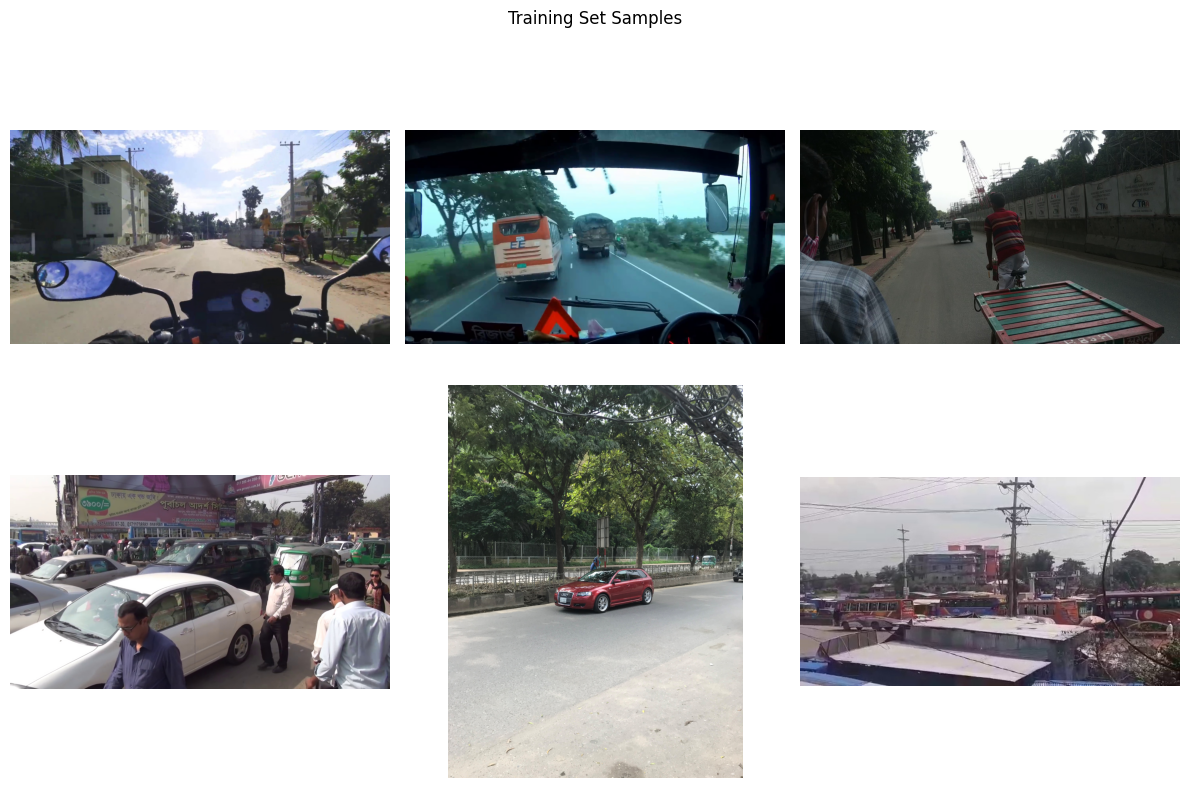


Displaying Validation Set Samples...


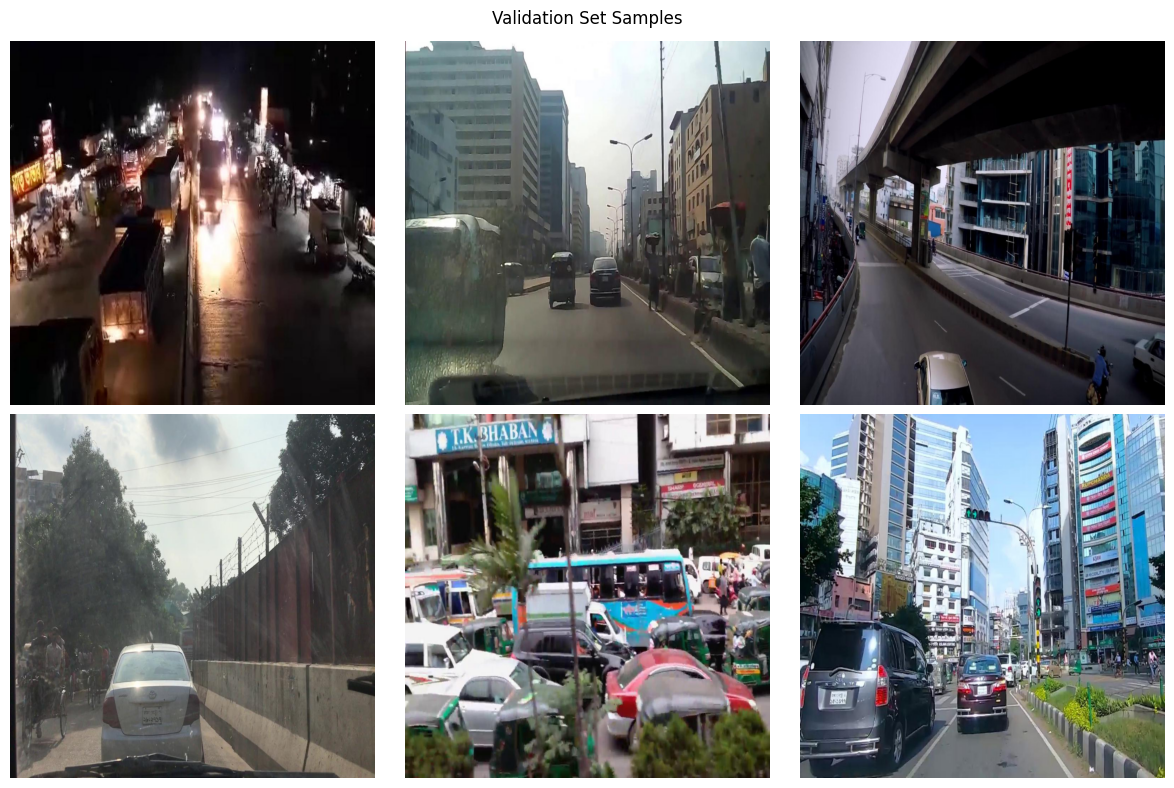

In [12]:
import matplotlib.pyplot as plt

print("Displaying Training Set Samples...")
show_samples(TRAIN_IMAGES, 'Training Set Samples')
plt.show() # Explicitly show the plot

print("\nDisplaying Validation Set Samples...")
show_samples(VALID_IMAGES, 'Validation Set Samples')
plt.show() # Explicitly show the plot

# **Model Training**

In [13]:
model = YOLO('yolo11n')

training_results = model.train(
    data=DATA_YAML, # Use the DATA_YAML variable which points to the updated data.yaml
    imgsz=640,
    batch=16,
    epochs=2,
    project='runs/train',
    name='yolov11_vehicle',
    exist_ok=True
)

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vehicle-detection-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_vehicle, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 20                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 23        [16, 19, 22]  1    431452  ultralytics.nn.modules.head.Detect           [4, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,620 parameters, 2,590,604 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2511.4±624.9 MB/s, size: 555.3 KB)


train: Scanning /content/vehicle-detection-dataset/train/Final Train Dataset... 0 images, 3003 backgrounds, 0 corrupt: 100%|██████████| 3003/3003 [00:15<00:00, 195.56it/s] 

train: /content/vehicle-detection-dataset/train/Final Train Dataset/144.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/145.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/146.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/147.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/148.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/149.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/150.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/151.jpg: corrupt JPEG restored and saved
train: /content/vehicle-detection-dataset/train/Final Train Dataset/152.jpg: corrupt JPEG restored and saved
train: /content/veh

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 573.2±89.0 MB/s, size: 97.6 KB)


val: Scanning /content/vehicle-detection-dataset/test1/test... 0 images, 500 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 3500.65it/s]

WARNING ⚠️ val: No labels found in /content/vehicle-detection-dataset/test1/test.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /content/vehicle-detection-dataset/test1/test.cache
WARNING ⚠️ Labels are missing or empty in /content/vehicle-detection-dataset/test1/test.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/train/yolov11_vehicle/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/yolov11_vehicle
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      2.21G          0      105.1          0          0        640: 100%|██████████| 188/188 [01:48<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]

                   all        500          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      2.74G          0      65.37          0          0        640: 100%|██████████| 188/188 [01:28<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.32it/s]

                   all        500          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



2 epochs completed in 0.059 hours.
Optimizer stripped from runs/train/yolov11_vehicle/weights/last.pt, 5.5MB
Optimizer stripped from runs/train/yolov11_vehicle/weights/best.pt, 5.5MB

Validating runs/train/yolov11_vehicle/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:668: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:713: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:713: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_m

                   all        500          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/train/yolov11_vehicle


# **Visualization**

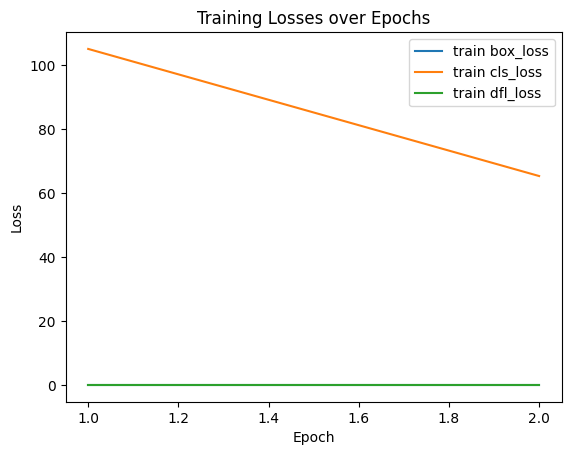

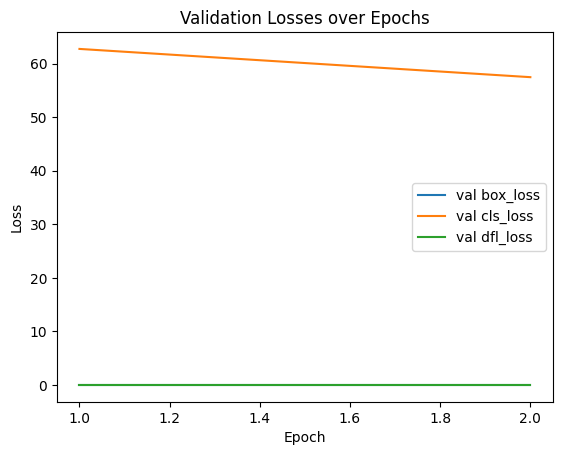

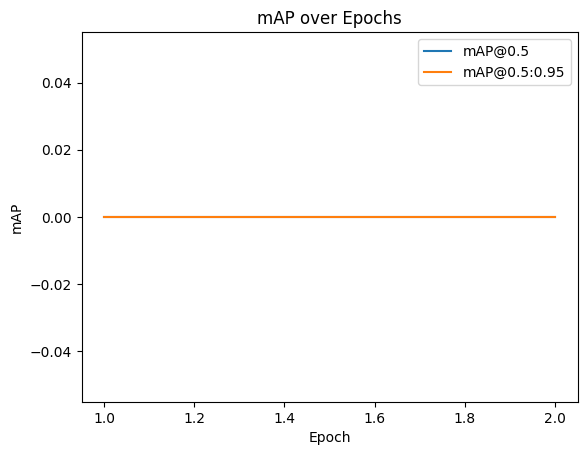

In [14]:
from pathlib import Path
import matplotlib.pyplot as plt
def plot_results(run_dir):
    f = Path(run_dir) / 'results.csv'
    if not f.exists():
        raise FileNotFoundError(f"No results.csv in {run_dir}")
    df = pd.read_csv(f)

    epochs = df['epoch']

    # 1) Training losses
    plt.figure()
    plt.plot(epochs, df['train/box_loss'], label='train box_loss')
    plt.plot(epochs, df['train/cls_loss'], label='train cls_loss')
    plt.plot(epochs, df['train/dfl_loss'], label='train dfl_loss')
    plt.title('Training Losses over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 2) Validation losses
    plt.figure()
    plt.plot(epochs, df['val/box_loss'], label='val box_loss')
    plt.plot(epochs, df['val/cls_loss'], label='val cls_loss')
    plt.plot(epochs, df['val/dfl_loss'], label='val dfl_loss')
    plt.title('Validation Losses over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 3) mAP curves
    plt.figure()
    plt.plot(epochs, df['metrics/mAP50(B)'],      label='mAP@0.5')
    plt.plot(epochs, df['metrics/mAP50-95(B)'],   label='mAP@0.5:0.95')
    plt.title('mAP over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.show()

plot_results('runs/train/yolov11_vehicle')

✅ Found 3358 images and 0 labels
            image                                         image_path  \
0   Navid_755.jpg  vehicle-detection-dataset/train/Final Train Da...   
1          61.jpg  vehicle-detection-dataset/train/Final Train Da...   
2  Numan_(77).jpg  vehicle-detection-dataset/train/Final Train Da...   
3         139.jpg  vehicle-detection-dataset/train/Final Train Da...   
4          29.jpg  vehicle-detection-dataset/train/Final Train Da...   

   has_label  
0      False  
1      False  
2      False  
3      False  
4      False  

📊 Dataset Info:
has_label
False    3358
Name: count, dtype: int64


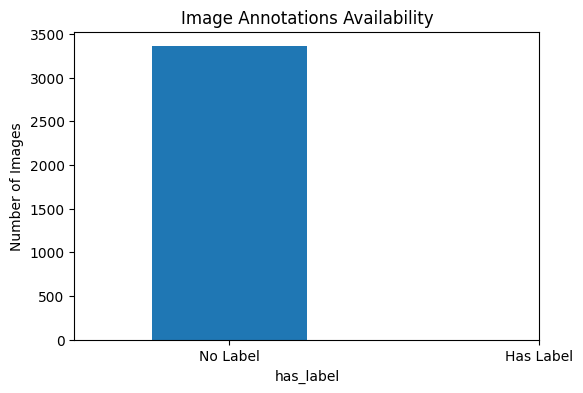

⚠️ No classes found in label files.


In [18]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Walk through dataset and collect files
image_files = []
label_files = []

for dirname, _, filenames in os.walk('vehicle-detection-dataset'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(filepath)
        elif filename.endswith('.txt') and "classes" not in filename.lower():
            label_files.append(filepath)

print(f"✅ Found {len(image_files)} images and {len(label_files)} labels")

# Step 2: Build DataFrame for analysis
df = pd.DataFrame({
    "image": [os.path.basename(f) for f in image_files],
    "image_path": image_files
})
df["has_label"] = df["image"].apply(
    lambda x: os.path.splitext(x)[0] + ".txt" in [os.path.basename(f) for f in label_files]
)

print(df.head())

# Step 3: Basic statistics
print("\n📊 Dataset Info:")
print(df["has_label"].value_counts())

# Step 4: Visualization
plt.figure(figsize=(6,4))
df["has_label"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["No Label", "Has Label"], rotation=0)
plt.title("Image Annotations Availability")
plt.ylabel("Number of Images")
plt.show()

# Optional: Class distribution (YOLO label files)
classes = []
for label_file in label_files:
    with open(label_file, "r") as f:
        for line in f.readlines():
            cls = int(line.strip().split()[0])  # first column = class id
            classes.append(cls)

if classes:
    class_df = pd.Series(classes, name="class_id").value_counts().sort_index()
    print("\n📊 Class Distribution:\n", class_df)

    plt.figure(figsize=(6,4))
    class_df.plot(kind="bar")
    plt.title("Class Distribution in Dataset")
    plt.xlabel("Class ID")
    plt.ylabel("Number of Objects")
    plt.show()
else:
    print("⚠️ No classes found in label files.")


In [19]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [20]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [21]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [16]:
test_results = model.predict( # Use the evaluated model
    source=TEST_IMAGES,
    imgsz=640,
    batch=16,
    save=True,
    project='runs/test',
    name='yolov11_vehicle',
    conf=0.25 # Lower the confidence threshold
)


image 1/500 /content/vehicle-detection-dataset/test1/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 640x640 (no detections), 6.8ms
image 2/500 /content/vehicle-detection-dataset/test1/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 640x640 (no detections), 6.8ms
image 3/500 /content/vehicle-detection-dataset/test1/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 640x640 (no detections), 6.8ms
image 4/500 /content/vehicle-detection-dataset/test1/test/Sabiha_(01)_jpg.rf.f935c7fc51a14c64e34c17a17c41cb1f.jpg: 640x640 (no detections), 6.8ms
image 5/500 /content/vehicle-detection-dataset/test1/test/Sabiha_(10)_jpg.rf.d163e2a53d5ed22112e9ead62807acf4.jpg: 640x640 (no detections), 6.8ms
image 6/500 /content/vehicle-detection-dataset/test1/test/Sabiha_(11)_jpg.rf.36299290e6d6ce12423051e1f5084f05.jpg: 640x640 (no detections), 6.8ms
image 7/500 /content/vehicle-detection-dataset/test1/test/Sabiha_(12)_jpg.rf.4da4073318b165b77ad9cc547cf82f1f.jpg: 640x640 (no detec

Displaying sample images from the prediction results directory: runs/test/yolov11_vehicle


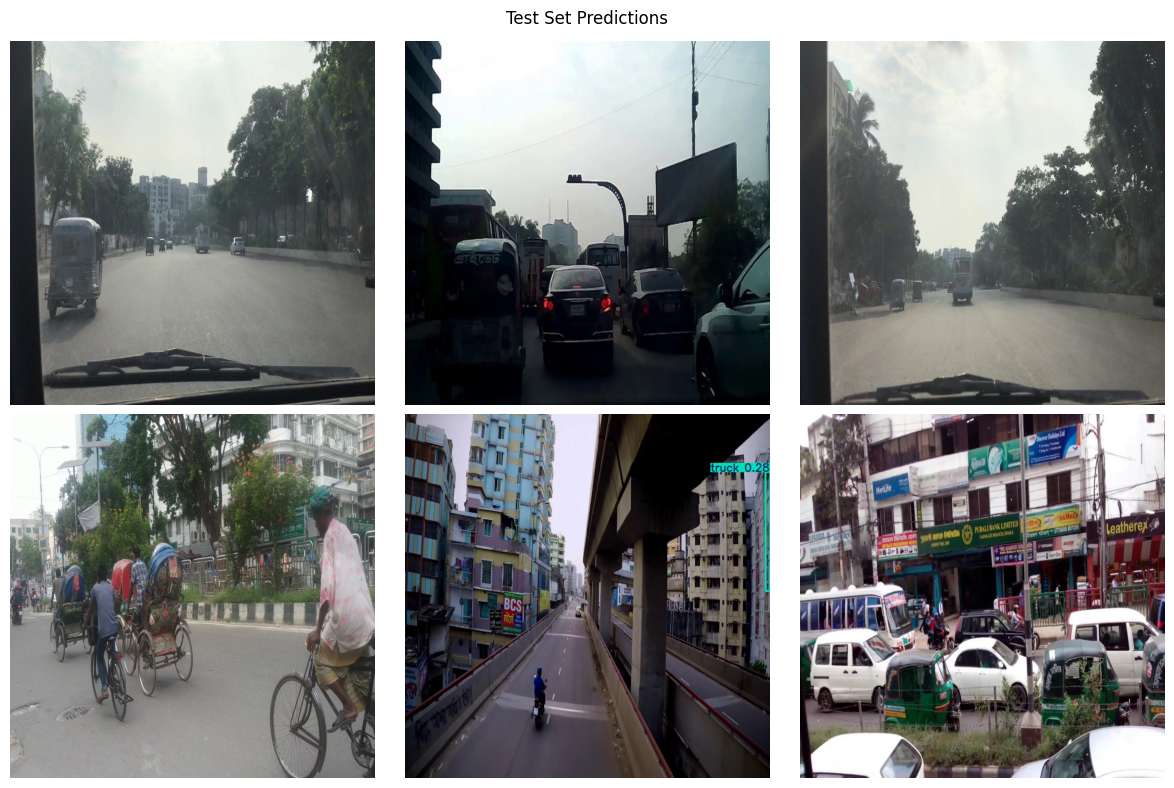

In [17]:
PRED_DIR = 'runs/test/yolov11_vehicle'

print(f"Displaying sample images from the prediction results directory: {PRED_DIR}")
# Note: These images might not show detections yet as the model training might require more epochs or tuning.
show_samples(PRED_DIR, 'Test Set Predictions')